
Last 6 rows

     age  sex  cp  trtbps  chol  fbs  rest_ecg  thalachh  oldpeak  slp  caa  \
297   44    1   0     112   290    0         0       153      0.0    2    1   
298   55    1   0     132   353    0         1       132      1.2    1    1   
299   60    1   0     130   253    0         1       144      1.4    2    1   
300   59    1   0     164   176    1         0        90      1.0    1    2   
301   57    1   0     110   335    0         1       143      3.0    1    1   
302   50    1   2     140   233    0         1       163      0.6    1    1   

     thall  exng  output  
297      2     0       0  
298      3     1       0  
299      3     1       0  
300      1     0       0  
301      3     1       0  
302      3     0       0  

First 6 rows

   age  sex  cp  trtbps  chol  fbs  rest_ecg  thalachh  oldpeak  slp  caa  \
0   42    1   1     120   295    0         1       162      0.0    2    0   
1   35    1   1     122   192    0         1       174      0.0    2    0 

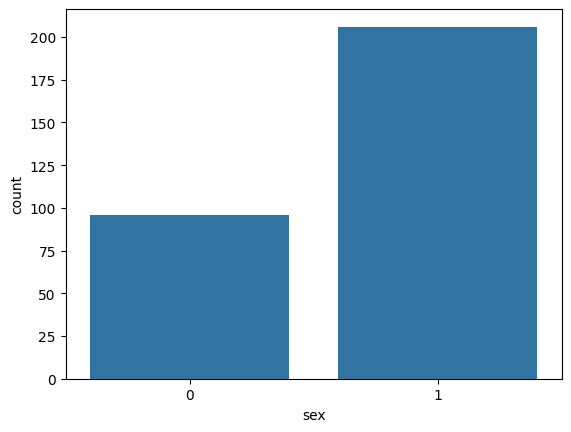

In [2]:
import csv
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

heartds = pd.read_csv('https://raw.githubusercontent.com/orionmc/SoftEng0/main/heart0.csv')

# For quick overview of the data we can use either tail or head functions
print("\nLast 6 rows\n",heartds.tail(6),sep=os.linesep)
print("\nFirst 6 rows\n",heartds.head(6),sep=os.linesep)
# heartds.to_csv(r'c:\mytestprj\heart0.csv', index=False) # write the dataframe to csv file on specified location.

# check for missing values in the dataset
# print(heartds[heartds.isna().any(axis=1)]) # print the rows with missing values
print(heartds.isna())   # check for missing values in the dataset - print False if no missing values and True if missing values are present

# rectify the missing values in the dataset can be done in multiple ways
# fillna() with parameter ffill or bfill can be used to fill the missing values with the previous or next values
# they can be filled with 0-s or with median values 
# or we can simply use dropna() to drop the rows with missing values

heartds_no_missing = heartds.dropna()   # drop the rows with missing values

heartds[heartds.duplicated()]           # check for duplicate rows in the dataset
heartds.drop_duplicates(inplace=True)   # drop the duplicate rows in the dataset

# Print basic stat
print("\nBasic Stat\n",heartds.describe(),sep=os.linesep)

sns.countplot(x='sex', data=heartds)
plt.show()

